## Transient Rates

In [1]:
from hoki import load
import pandas as pd
import matplotlib.pyplot as plt

path = "/mnt/home/student/cranit/Data/BPASS/BPASSv2.2.1_release-07-18-Tuatara/bpass_v2.2.1_imf135_300/supernova-bin-imf135_300.z002.dat"
bin_rates = load.model_output(path)

bin_rates.head()

,log_age,Ia,IIP,II,Ib,Ic,LGRB,PISNe,low_mass,e_Ia,e_IIP,e_II,e_Ib,e_Ic,e_LGRB,e_PISNe,e_low_mass,age_yrs
0,6.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,1122019.00
1,6.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,290520.12
2,6.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,365743.12
3,6.3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,460443.62
4,6.4,0.0,0.0,0.0,3.847896,0.0,0.0,5.109734,0.0,0.0,0.0,0.0,0.496761,0.0,0.0,0.80792,0.0,579664.00


In [2]:
# The last time bin in BPASS does some weird stuff so it's better to just ignore it.
bin_rates = bin_rates[:-1]

# We are going to use the log_age and the size of the bin in years a lot, so I'm just renaming them for ease.
age = bin_rates.log_age.values
bin_size = bin_rates.age_yrs.values

### Core Collapse Supernova Rates

In [3]:
ccsne = ( bin_rates[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))
ccsne_norm = ccsne/bin_size/(10**6)
typeIa_norm = bin_rates.Ia.values /bin_size/(10**6)
lgrbs_norm = bin_rates.LGRB.values /bin_size/(10**6)
pisne_norm = bin_rates.PISNe.values/bin_size/(10**6)

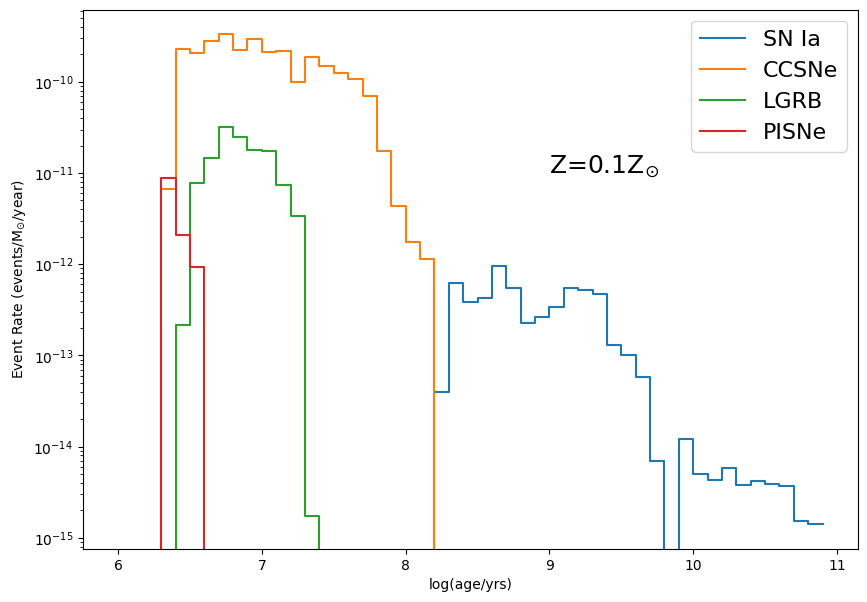

In [4]:
plt.figure(figsize = (10,7))

plt.step(age, typeIa_norm, label='SN Ia')
plt.step(age, ccsne_norm, label='CCSNe')
plt.step(age, lgrbs_norm, label='LGRB')
plt.step(age, pisne_norm, label='PISNe')

plt.yscale("log")

plt.text(9, 10**(-11), r"Z=0.1Z$_{\odot}$", fontsize=18)

plt.ylabel(r"Event Rate (events/M$_{\odot}$/year)")
plt.xlabel("log(age/yrs)")
plt.legend(fontsize=16)

## HR diagram

In [2]:
from hoki import load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading the HR diagrams for signle stars and binary star populations
path_sin="/mnt/home/student/cranit/Data/BPASS/BPASSv2.2.1_release-07-18-Tuatara/bpass_v2.2.1_imf135_300/hrs-sin-imf135_300.z020.dat"
path_bin="/mnt/home/student/cranit/Data/BPASS/BPASSv2.2.1_release-07-18-Tuatara/bpass_v2.2.1_imf135_300/hrs-bin-imf135_300.z020.dat"
sin_hr_diagram = load.model_output(path_sin, hr_type = 'TL')
bin_hr_diagram = load.model_output(path_bin, hr_type = 'TL')

Stack has been reset
Stack has been reset


/tmp/ipykernel_3040448/575448796.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  my_plot.legend() # a legend


Text(0.5, 1.0, 'Single stars')

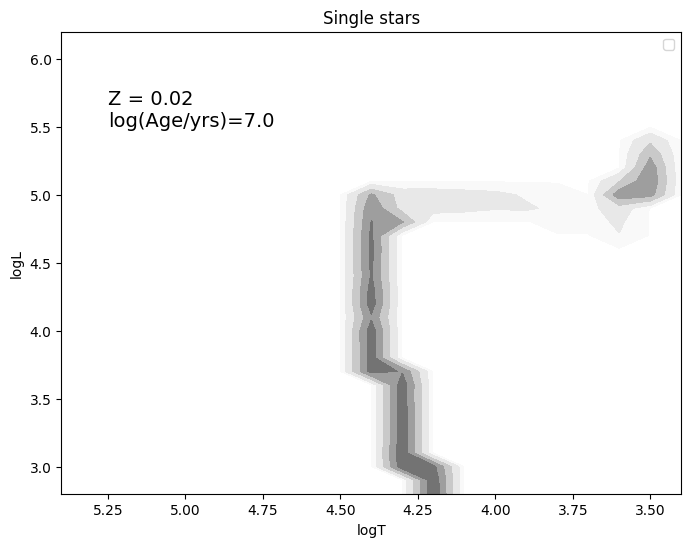

In [4]:
# Just maing sure teh figure size is sensible
plt.figure(figsize=(8,6))

# Plotting the hr_diagram (all hydrogen abundances added up) at the 10 million year time bin
my_plot = sin_hr_diagram.plot(log_age=7.0)

# Addind the observational data of Upper Scorpio
# my_plot.scatter(usco.Temperature, usco.Luminosity, label='Usco', s=50)

# Customizing the visualisation
my_plot.set_xlim([5.4, 3.4])
my_plot.set_ylim([2.8, 6.2]) # better limits
my_plot.text(5.25, 5.5, "Z = 0.02 \nlog(Age/yrs)=7.0", fontsize = 14) # Informative text
my_plot.legend() # a legend
my_plot.set_title('Single stars') # A title

## Spectra

In [5]:
from hoki import load
from hoki.spec import dopcor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [6]:
p_z002 = "/mnt/home/student/cranit/Data/BPASS/BPASSv2.2.1_release-07-18-Tuatara/bpass_v2.2.1_imf135_300/spectra-bin-imf135_300.z002.dat"
p_z020 = "/mnt/home/student/cranit/Data/BPASS/BPASSv2.2.1_release-07-18-Tuatara/bpass_v2.2.1_imf135_300/spectra-bin-imf135_300.z020.dat"


ss_z002 = load.model_output(p_z002)
ss_z020 = load.model_output(p_z020)

ss_z002.head()

,WL,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,...,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0
0,1.0,2.745775e-40,2.702434e-40,3.047202e-40,4.195247e-38,7.912627e-38,2.884525e-38,9.237552e-39,1.976199e-38,5.478071e-38,...,3.143051e-40,4.732241e-40,2.407628e-40,1.854254e-40,1.770071e-40,3.505892e-40,1.656219e-40,1.040945e-40,2.193011e-40,3.402488e-41
1,2.0,2.745775e-40,2.702434e-40,3.047202e-40,4.195247e-38,7.912627e-38,2.884525e-38,9.237552e-39,1.976199e-38,5.478071e-38,...,3.143051e-40,4.732241e-40,2.407628e-40,1.854254e-40,1.770071e-40,3.505892e-40,1.656219e-40,1.040945e-40,2.193011e-40,3.402488e-41
2,3.0,2.745775e-40,2.702434e-40,3.047202e-40,4.195247e-38,7.912627e-38,2.884525e-38,9.237552e-39,1.976199e-38,5.478071e-38,...,3.143051e-40,4.732241e-40,2.407628e-40,1.854254e-40,1.770071e-40,3.505892e-40,1.656219e-40,1.040945e-40,2.193011e-40,3.402488e-41
3,4.0,2.745775e-40,2.702434e-40,3.047202e-40,4.195247e-38,7.912627e-38,2.884525e-38,9.237552e-39,1.976199e-38,5.478071e-38,...,3.143051e-40,4.732241e-40,2.407628e-40,1.854254e-40,1.770071e-40,3.505892e-40,1.656219e-40,1.040945e-40,2.193011e-40,3.402488e-41
4,5.0,2.745775e-40,2.702434e-40,3.047202e-40,4.195247e-38,7.912627e-38,2.884525e-38,9.237552e-39,1.976199e-38,5.478071e-38,...,3.143051e-40,4.732241e-40,2.407628e-40,1.854254e-40,1.770071e-40,3.505892e-40,1.656219e-40,1.040945e-40,2.193011e-40,3.402488e-41


In [11]:
ss_z002 = ss_z002[(ss_z002.WL>100) & (ss_z002.WL<9000)]
ss_z020 = ss_z020[(ss_z020.WL>100) & (ss_z020.WL<9000)]

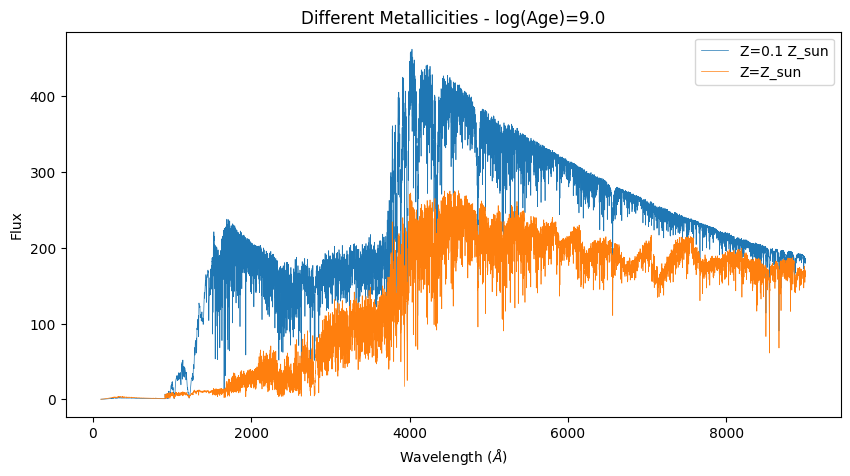

In [12]:
plt.figure(figsize=(10,5))

plt.plot(ss_z002.WL, ss_z002['9.0'], label='Z=0.1 Z_sun', lw=0.5)
plt.plot(ss_z002.WL, ss_z020['9.0'], label='Z=Z_sun', lw=0.5)

plt.title('Different Metallicities - log(Age)=9.0')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux')
plt.legend()

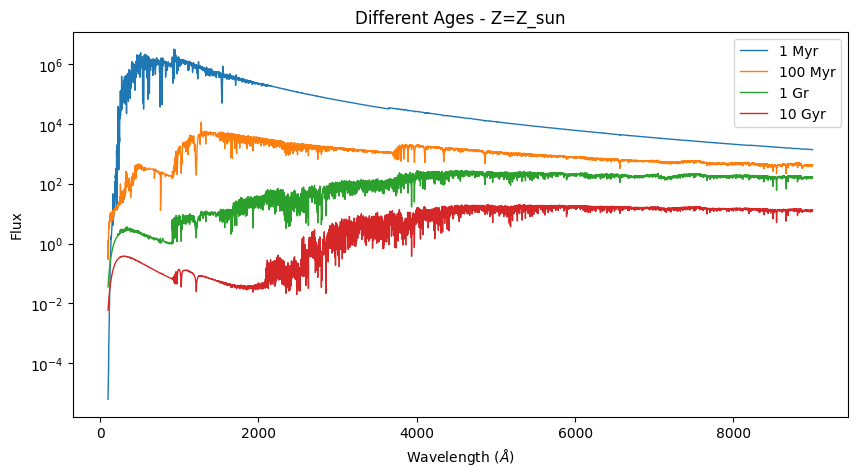

In [13]:
plt.figure(figsize=(10,5))

plt.plot(ss_z002.WL, ss_z020['6.0'], label='1 Myr', lw=1)
plt.plot(ss_z002.WL, ss_z020['8.0'], label='100 Myr', lw=1)
plt.plot(ss_z002.WL, ss_z020['9.0'], label='1 Gr', lw=1)
plt.plot(ss_z002.WL, ss_z020['10.0'], label='10 Gyr', lw=1)

plt.title('Different Ages - Z=Z_sun')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux')
plt.yscale("log")
plt.legend()

In [14]:
WL = ss_z020.WL.values
ss_z020_scaled = pd.DataFrame(MinMaxScaler().fit_transform(ss_z020.values)[:,1:], # Not doing the wavelength column
                              columns = ss_z020.columns[1:])

ss_z002_scaled = pd.DataFrame(MinMaxScaler().fit_transform(ss_z002.values)[:,1:],
                              columns = ss_z002.columns[1:])

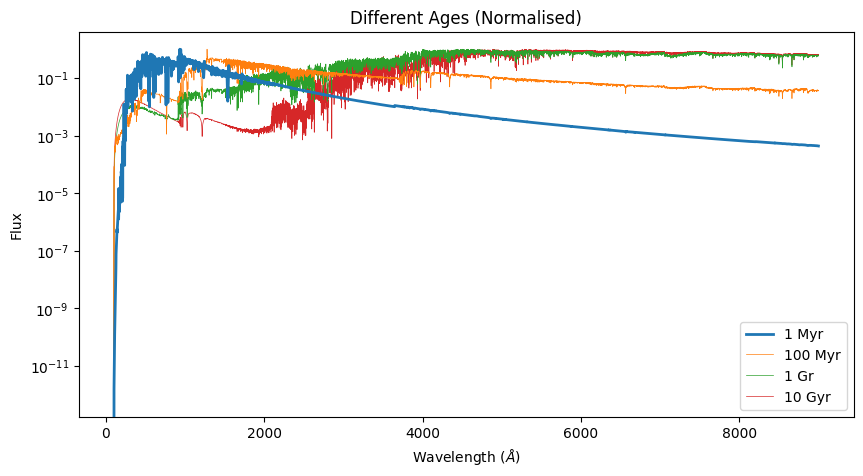

In [15]:
plt.figure(figsize=(10,5))

plt.plot(WL, ss_z020_scaled['6.0'], label='1 Myr', lw=2, zorder=5)
plt.plot(WL, ss_z020_scaled['8.0'], label='100 Myr', lw=0.5, zorder=4)
plt.plot(WL, ss_z020_scaled['9.0'], label='1 Gr', lw=0.5, zorder=3)
plt.plot(WL, ss_z020_scaled['10.0'], label='10 Gyr', lw=0.5, zorder=2)

plt.title('Different Ages (Normalised)')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux')
plt.yscale("log")
plt.legend()